<a href="https://colab.research.google.com/github/Bhushan0097/02.CAPSTONE.ML.REGRESSION-BikeShareDemandPrediction/blob/main/Notebook/BikeShareDemandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



**Project Type**    Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Buddhabhushan Nagrale
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Bhushan0097/02.CAPSTONE.ML.REGRESSION-BikeShareDemandPrediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Dataset First View

In [3]:
# Dataset First Look

path = '/content/gdrive/MyDrive/AlmaBetter/Module 6 Machine Learning/Capstone Project - Regression/SeoulBikeData.csv'

BikeShare = pd.read_csv('/content/gdrive/MyDrive/AlmaBetter/Module 6 Machine Learning/Capstone Project - Regression/SeoulBikeData.csv' , encoding='unicode_escape')
BikeShare.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
BikeShare.iloc[[744]]

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
744  01/01/2018                206     0             -3.2           40   

     Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
744               0.5              1358                      -14.9   

     Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  Holiday  \
744                      0.0           0.0            0.0  Winter  Holiday   

    Functioning Day  
744             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

print('No of Rows    : ',BikeShare.shape[0])
print('No of Columns : ',BikeShare.shape[1])

No of Rows    :  8760
No of Columns :  14


### Dataset Information

In [6]:
# Dataset Info
BikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
# Dataset Duplicate Value Count
print(f'Total Number of Duplicate Records found : {BikeShare.duplicated(keep=False).sum()}')

Total Number of Duplicate Records found : 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

# Missing Values/Null Values Count

print(" Count total NaN at each column in a DataFrame : \n")
print(BikeShare.isnull().sum())

 Count total NaN at each column in a DataFrame : 

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [9]:
# Visualizing the missing values

As there are no Missing values present hence we cannot visualize the missing values

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
BikeShare.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe

BikeShare.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

from prettytable import PrettyTable #importing PrettyTable for tabular visualatization of data
tab = PrettyTable()

In [13]:
#displaying unique variables only for Object  datetypes

objects = [features for features in BikeShare.columns if BikeShare[features].dtypes == 'O']
objects

['Date', 'Seasons', 'Holiday', 'Functioning Day']

In [14]:
# Dropping Date
objects[1:]

['Seasons', 'Holiday', 'Functioning Day']

In [15]:


# Check Unique Values for each variable.

tab.field_names = ["Variable", "No. of Unique Values","Unique Values"]

for x in BikeShare[objects[1:]]:
  tab.add_row([x, BikeShare[x].nunique(),BikeShare[x].unique()])

tab.align["Variable"] = "l" #setting alingment of Column to left


print(tab)

+-----------------+----------------------+---------------------------------------+
| Variable        | No. of Unique Values |             Unique Values             |
+-----------------+----------------------+---------------------------------------+
| Seasons         |          4           | ['Winter' 'Spring' 'Summer' 'Autumn'] |
| Holiday         |          2           |        ['No Holiday' 'Holiday']       |
| Functioning Day |          2           |              ['Yes' 'No']             |
+-----------------+----------------------+---------------------------------------+


## 3. ***Data Wrangling***

### Data Wrangling Code

>  <h3> <font color ="#F39C12 ">  <b> Renaming Features (Columns) </h4>

In [16]:
BikeShare.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [17]:
New_cols_name =[ (x.split('(')[0]) for x in BikeShare.columns ]
print(New_cols_name)

New_cols_name =[ (x.rstrip(' ')) for x in New_cols_name]
print(New_cols_name)

['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed ', 'Visibility ', 'Dew point temperature', 'Solar Radiation ', 'Rainfall', 'Snowfall ', 'Seasons', 'Holiday', 'Functioning Day']
['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day']


In [18]:
Cols_dict = {a:b for a,b in zip (BikeShare.columns ,New_cols_name ) }

BikeShare2 = BikeShare.rename(columns= Cols_dict)
BikeShare2.head()

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

>  <h3> <font color ="#F39C12 ">  <b> Converting data types </h4>

In [19]:
# Write your code to make your dataset analysis ready.

# Converting Date Column datatype from Object to DateTime
BikeShare2['Date'] = pd.to_datetime(BikeShare2['Date'] , format='%d/%m/%Y')
BikeShare2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [20]:
BikeShare2.head()

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

 <h2>➨<i> <font color ="#1C2833"> &nbsp; TimeSeries Analysis

In [21]:
# Extract the day name
BikeShare2['day'] = BikeShare2['Date'].dt.day_name()

# Extract the month name
BikeShare2['month'] = BikeShare2['Date'].dt.strftime('%B')

In [22]:
BikeShare2.head()

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning Day     day     month  
0  Winter  No Holiday             Yes  Friday  December  
1  Winter  No Holiday             Yes  Friday  December  
2  Winter  No Holiday             Yes  Friday  December  
3  Winter  No Holiday             Yes  Friday  December  
4  Winter  No Holiday             Yes  Friday  December

In [23]:
# Get the first and last date
first_date = BikeShare2['Date'].min()
last_date = BikeShare2['Date'].max()

print("First Date: ", first_date.date())
print("Last Date: ", last_date.date())

First Date:  2017-12-01
Last Date:  2018-11-30


In [24]:
# No of days of data stored in the dataset
BikeShare2['Date'].nunique()

365

### What all manipulations have you done and insights you found?

<ul> <h2> <font color ="#1C2833"> <b> Manipulations performed on the data <br> ---------------------------------------------------------------</b></h2>
<ol>
<h4>
<li> <b>  Converting DataTypes : </b > Converted Date Column datatype from object to DateTime  </li>
<li> <b>  TimeSeries Analysis : </b >
<ul>
 <li> The dateset stores information from date 2017-01-12 to 2018-12-11. </li>
  </ul>
</li>

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

>  <h2> <b> <font color ="#333"> Distribution of Rented Bike Count Column </div> </b>




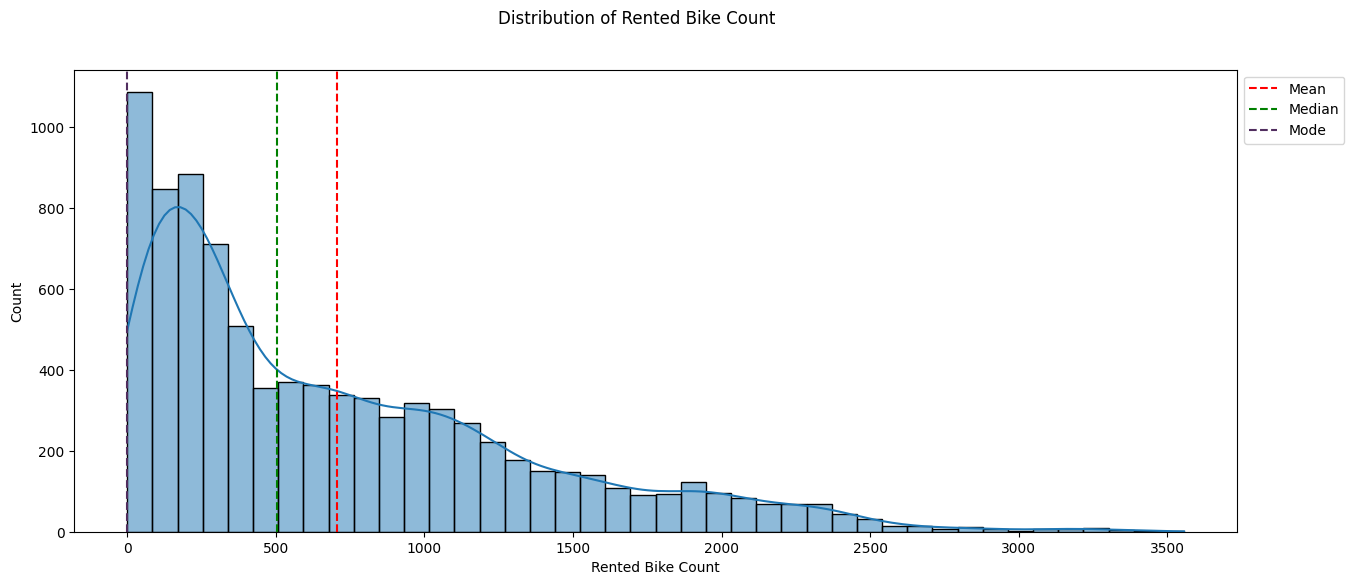

In [25]:
# Chart - 1 visualization code

fig, ax = plt.subplots(figsize=(15,6))

fig.suptitle('Distribution of Rented Bike Count')

Column =  BikeShare2['Rented Bike Count']

sns.histplot(Column, kde = True)
plt.axvline(Column.mean(), color= 'Red', linestyle = 'dashed', linewidth =1.5 ,label = 'Mean')
plt.axvline(Column.median(), color= 'Green', linestyle = 'dashed', linewidth =1.5 ,label = 'Median')
plt.axvline(Column.mode()[0], color= '#512E5F', linestyle = 'dashed', linewidth =1.5 ,label = 'Mode')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

plt.show()

In [26]:
print("Mean   : ",BikeShare2['Rented Bike Count'].mean())
print("Median : ",BikeShare2['Rented Bike Count'].median())
print("Mode   : ",BikeShare2['Rented Bike Count'].mode()[0] )


Mean   :  704.6020547945205
Median :  504.5
Mode   :  0


##### 1. Why did you pick the specific chart?

<ol> Histogram is used to visualize the distribution of the "Rented Bike Count" column since histograms are excellent for displaying the frequency or count of data points in different ranges or bins.To understand how the rented bike counts are distributed and as well to identify the patterns or trends in the data, a histogram is ideal for this purpose. Also it helps us to see the shape of the distribution and the concentration of data points in various value ranges.

##### 2. What is/are the insight(s) found from the chart?

<ol><b> Insight(s) found from the chart :  </b>

<ol> <li> <b> Shape of the Distribution:</b>In the chart its displayed that the shape of the histogram is RightSkwed.</li>

<li> <b> Central Tendency: </b>The Vertical lines displays the position of Mean , Median and Mode.
  <ul><li> Mean is present at 704.6 </li>
  <li> Median is present at 504.5 </li>
  <li> Mode is present at 0 </li>
</li>  </ul>

<li> <b> Spread and Variability: </b> The distribution shows that the spread is not symettiric. Since the distribution is right-skwed hence  there are outliers present in the data.   </li>




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the histogram can have both positive and negative  implications for the bike-sharing business:

<b> Positive Impact </b> : The histogram shows peak on lower values , hence the probability that a bike is availble for rental will always be high.

<b> Negative Impact: </b> Since the histogram reveals right skewed distribution it could indicate challenges. For example, if there are extreme peaks that the business can't handle, it might lead to bike shortages during high-demand periods and oversupply during low-demand times. This can result in lost revenue or excessive operational costs.




#### Chart - 2

>  <h2> <b> <font color ="#333">  Plotting box plot of continuous variables </div> </b>



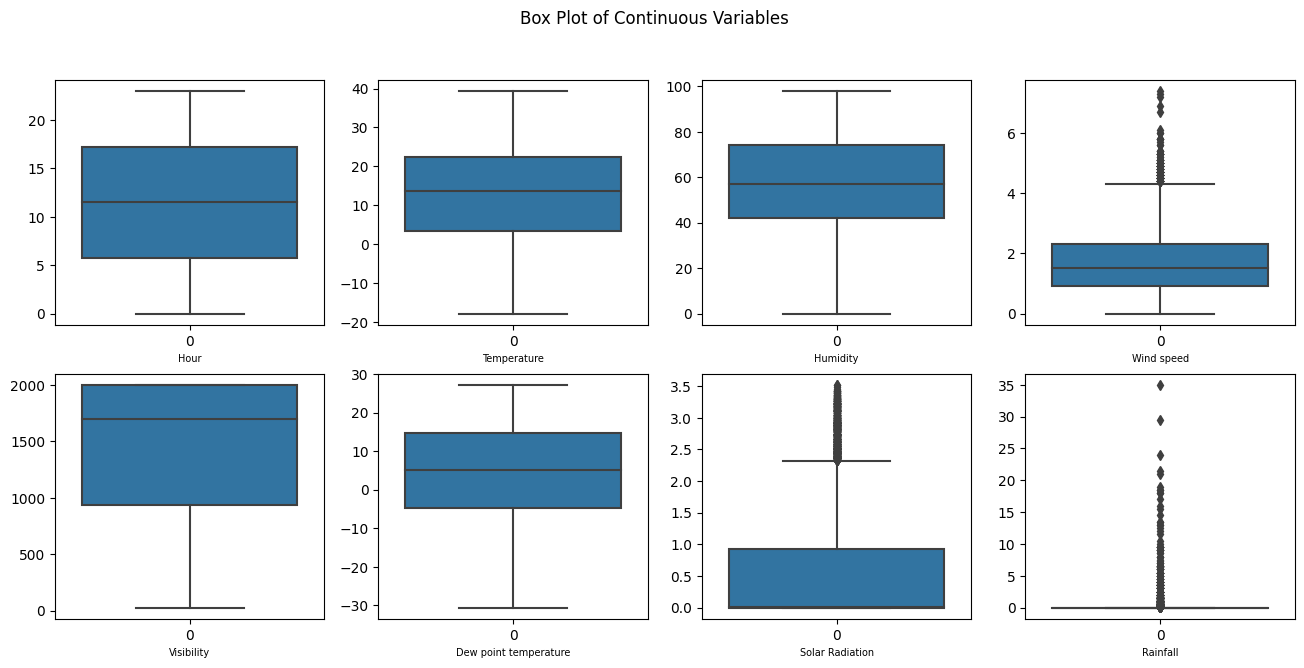

In [27]:
# Chart - 2 visualization code

numericals = [features for features in BikeShare2.columns if BikeShare2[features].dtypes != 'O']
numericals = numericals[2:]

fig, ax = plt.subplots(figsize=(16,7))

fig.suptitle('Box Plot of Continuous Variables')

for m,n in zip(range(1,len(numericals)),numericals):

  plt.subplot(2,4,m)
  boxplot = sns.boxplot(data = BikeShare2[n])
  boxplot.set_xlabel(n, fontsize=7)

plt.show()

##### 1. Why did you pick the specific chart?

Box plot can visualize the distribution and statistics of continuous variables in of dataset. Box plots are excellent for displaying the summary of a variable's distribution, including its median, quartiles, potential outliers, and overall spread. Box plot are particularly useful when we want to understand the central tendency and variability of the data and detect any outliers or extreme values.

##### 2. What is/are the insight(s) found from the chart?

<ol> <li> <b> Central Tendency: </b> The Box plots displays  information about the median and the lower and upper quartiles for each Continous Variable . This helps us to understand where the data tends to cluster. </li>


<li> <b>Outliers: </b> There are data points beyond the "whiskers" of the box plots of Windspeed , Solar Radiation and Rainfall , that are considered outliers. These are values that significantly deviate from the central data distribution and hence warrant further investigation. </li>

<li><b>Skewness: </b> The box plot of Hour ,Temperature , Humidity and Dew-point temperature are symmetric and hence have normal distribution  </li>

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<b> Positive Impact: </b>  The box plots for  continuous variables like Hour ,Temperature , Humidity and Dew-point temperature show a tight and symmetric distribution with minimal outliers. These are Natural factors that affect the bike rent count  , since the box plot is stable hence it can help in making accurate predictions and optimizing resource allocation, potentially leading to positive growth.

<b> Negative Impact: </b> The box plots reveal numerous outliers and  skewed distribution for the Windspeed , solar Radiation and Rainfall

>Outliers: Outliers preseent in these variables, indicate unexpected or irregular events which can affect demand, such as extreme weather conditions.Addressing these outliers will require additional resources and special strategies.

>Skewed Distribution: THe skewed distribution  imply that demand for bike rentals is concentrated during specific time periods or under particular circumstances. This may lead to issues like overallocation of resources during peak periods and underutilization during off-peak periods.


#### Chart - 3

>  <h2> <b> <font color ="#333">  Plotting box plot of Categorical variables </div> </b>



In [28]:
objects = [features for features in BikeShare2.columns if BikeShare2[features].dtypes == 'O']
objects

['Seasons', 'Holiday', 'Functioning Day', 'day', 'month']

In [29]:
new_objs = objects[0:4]

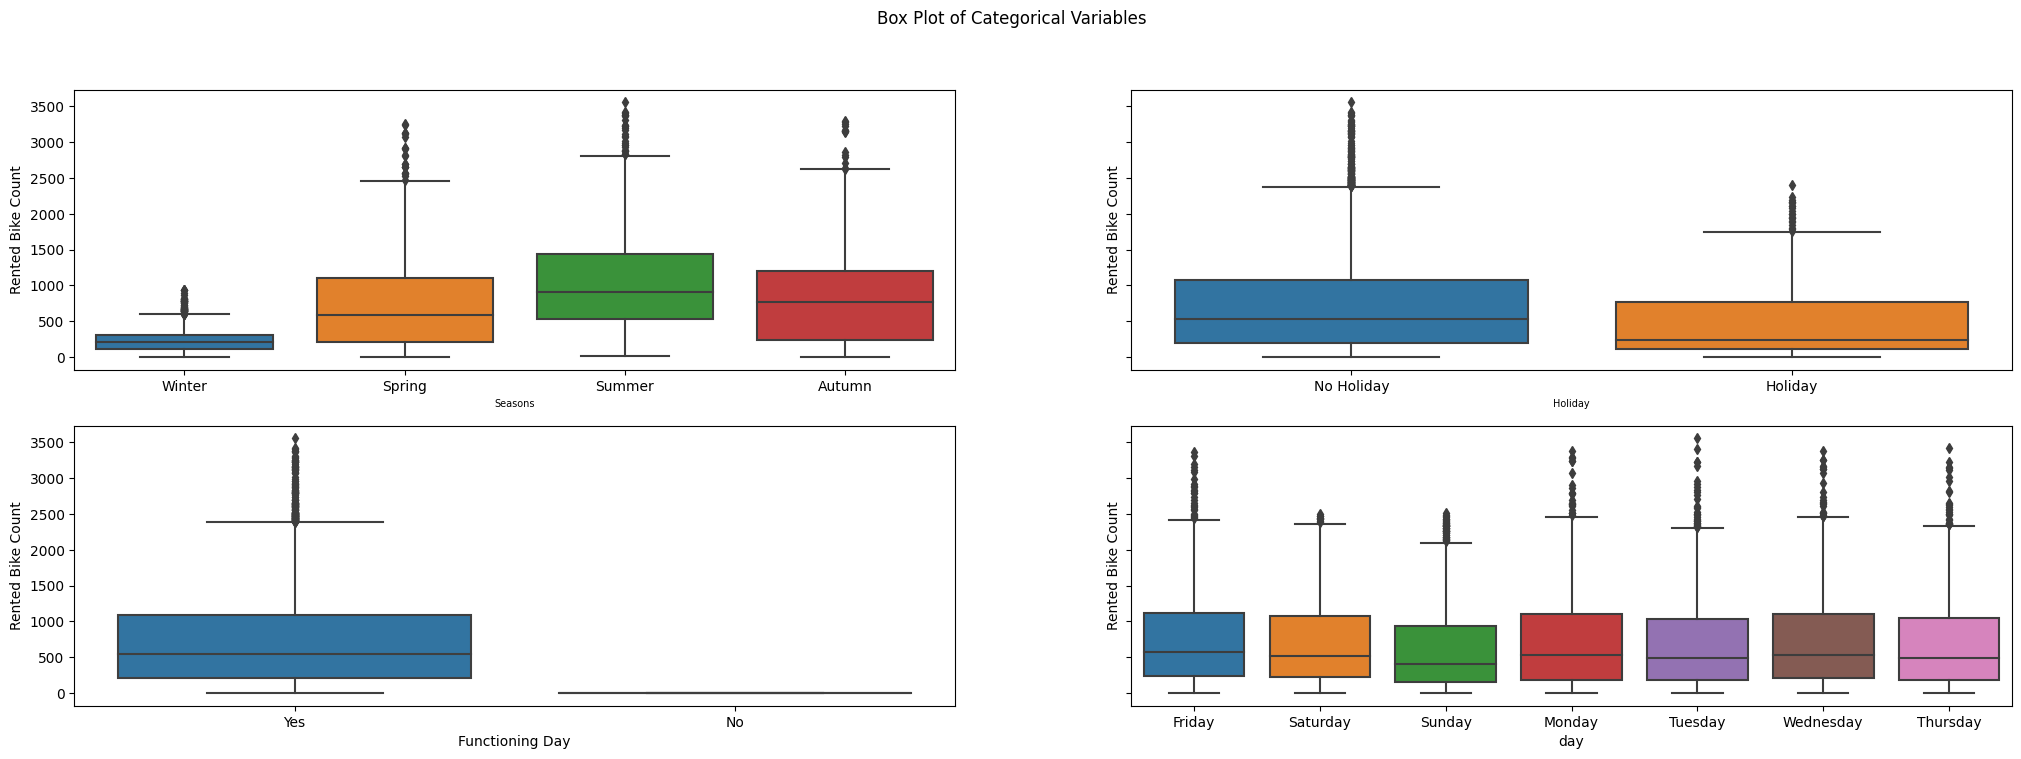

In [30]:
# Chart - 3 visualization code

fig, axes = plt.subplots(2, 2, figsize=(25, 8), sharey=True)

fig.suptitle('Box Plot of Categorical Variables')

for m,n in enumerate(new_objs):
  if m == 0 or m == 1 :
    boxplot1 =sns.boxplot(ax=axes[0, m] , x=n, y='Rented Bike Count', data=BikeShare2)
    boxplot1.set_xlabel(n, fontsize=7)
  else:
    boxplot1 = sns.boxplot(ax=axes[1, m-2] , x=n, y='Rented Bike Count', data=BikeShare2)
    boxplot1.set_xlabel(n, fontsize=10)


plt.show()

##### 1. Why did you pick the specific chart?

A Box plot with categorical variables on the x-axis and Rented Bike Count on the y-axis will help to visualize  the distribution of rented bike counts varies across different categories. This is particularly useful since  we want to compare the distribution of a numerical variable within multiple groups or categories.

##### 2. What is/are the insight(s) found from the chart?

<b> Variability by Category :</b> The boxes in the plot will show you the central tendency (median) and spread of rented bike counts for each category. By comparing the boxes across categories, you can see which categories tend to have higher or lower bike rental counts.

<b> Outliers : </b> Outliers are the individual data points outside the boxes, provide insights into categories with extreme values. From the plot we can identify if there are specific categories that consistently have unusually high or low bike rentals.

<b>Comparative Analysis : </b> From the boxes and whiskers for each category, we can compare the distributions and understand  the majority of bike rentals are concentration and whether there are any notable differences between categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** The box plot shows that certain categories such as Summer in season Column ,  consistently have higher bike rental counts, hence we can focus on optimizing resources and marketing efforts in those categories to potentially increase revenue.

**Negative Impact:** The box plot reveals categories such as Winter in season Column  with consistently low bike rentals and categories with significant outliers. This indicates areas where the business needs to adjust its strategies. For certain categories consistently have low bike rentals, the business may need to consider marketing initiatives or operational changes to boost rentals in those categories.



#### Chart - 4

>  <h2> <b> <font color ="#333">  Line Plot of Bike Rent Demand  by Month: </div> </b>

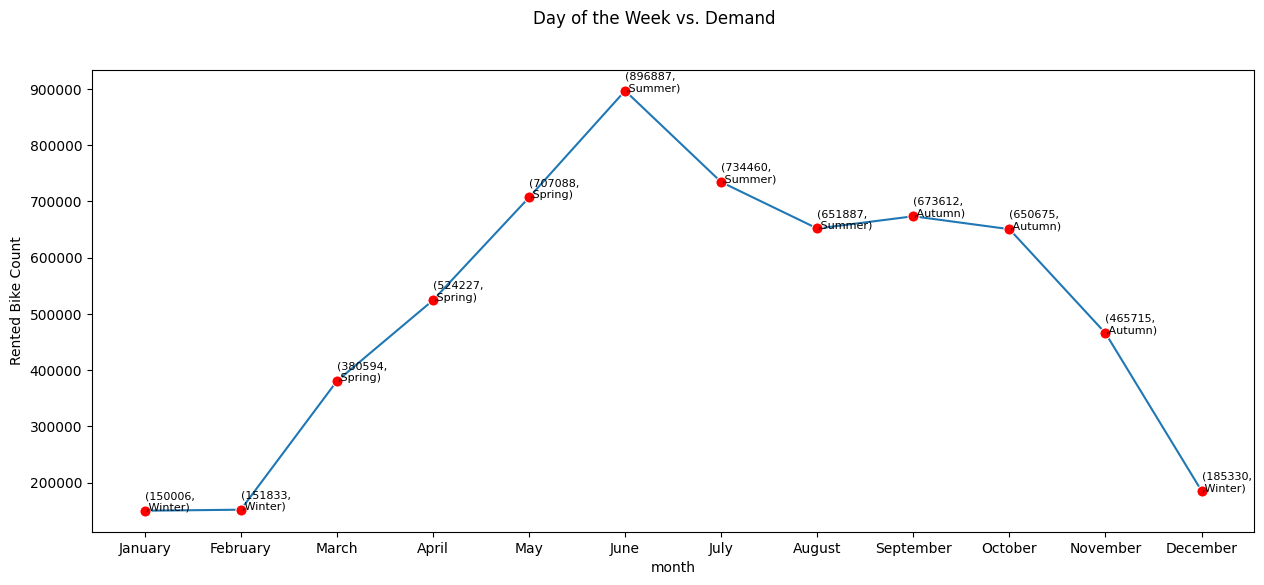

In [31]:
# Chart - 4 visualization code

#Grouping the dataset by 'month' column
month_count2 = BikeShare2.groupby(["month","Seasons"])["Rented Bike Count"].sum().reset_index(name="Rented Bike Count")

fig, ax = plt.subplots(figsize=(15,6))

fig.suptitle('Day of the Week vs. Demand')

#creating order for line plot display
months_in_order = ["January", "February","March","April","May","June","July","August","September","October","November","December" ]
df_sorted = month_count2.iloc[month_count2['month'].map(lambda x: months_in_order.index(x)).argsort()]

Line_plot_vis = sns.lineplot(data = df_sorted, x = 'month',y='Rented Bike Count', marker='o', markersize=8, markerfacecolor='red' )

for i, j,k in zip(df_sorted['month'],df_sorted['Rented Bike Count'],df_sorted['Seasons'] ):
    Line_plot_vis.text( i, j, f'({j},\n,{k})', fontsize = 8)


plt.show()


##### 1. Why did you pick the specific chart?

Line plot is useful for visualizing the demand for bike rentals over time because  it helps in revealing temporal patterns and trends. By plotting demand by month, we can easily observe seasonal variations, trends, and any potential patterns in the data. This is crucial for building a regression model, since it helps ro understand the time-dependent behavior of the target variable (i.e Rental Bike count).

##### 2. What is/are the insight(s) found from the chart?

 In the line plot we can identify a recurring pattern that at the end of thewinter season , during Spring Season( February to June)  , the slope of the line shows increase in demand of Bikes for Rent.
 Also  When Summer season gets started the demand of Bikes for Rent starts to go down.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Understanding the seasonal patterns and trends will  help us to optimize resource allocation. For instance, we can be prepared for increased demand during peak seasons and manage inventory and staffing more efficiently. This can lead to a positive impact on business operations and profitability.

**Negative Impact:** The line plot reveals declining demand over time, this is a signal need for strategic adjustments. Therefore we need to innovate its services, target new customer segments, and expand to new locations to counteract a negative trend. Neglecting such insights will lead to negative growth as the business fails to adapt to changing market conditions.

#### Chart - 5

>  <h2> <b> <font color ="#333"> Average Bike Sharing Demand on Holiday and Non-Holiday </div> </b>

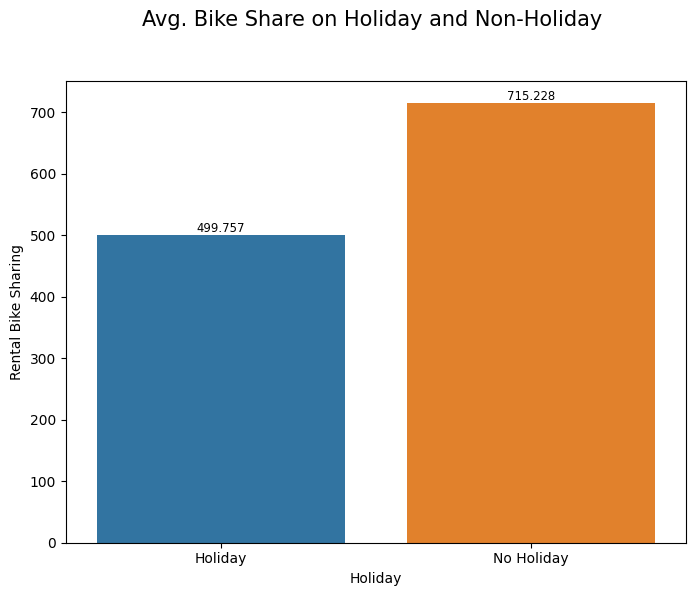

In [32]:
# Chart - 5 visualization code

Avg_count = pd.pivot_table(BikeShare2, values='Rented Bike Count', columns='Holiday', aggfunc='mean')
Avg_count = Avg_count.T.reset_index()

fig, ax = plt.subplots(figsize=(8, 6))


bar_plot3 = sns.barplot(data=Avg_count, x="Holiday", y="Rented Bike Count"  )

for i in bar_plot3.containers: # displaying the count number on top of each bar
    bar_plot3.bar_label(i , size='small')

plt.title("Avg. Bike Share on Holiday and Non-Holiday \n\n", fontsize=15, fontweight=0, loc='center' , style='normal' )
plt.xlabel('Holiday')
plt.ylabel('Rental Bike Sharing')

plt.show()


##### 1. Why did you pick the specific chart?

Bar plot provides an appropriate visualization for comparing the averages of a numerical variable (bike sharing demand) across two categories (holiday and non-holiday). Bar plots are well-suited for showing such comparisons and making it easy to see differences between groups.

##### 2. What is/are the insight(s) found from the chart?

**Difference in Averages:** By comparing the heights of the bars for holiday and non-holiday periods, we can see there is a significant difference in the average bike sharing demand between these two categories.


**Resource Allocation:** This comparison will help us in resource allocation and operational planning. Since holidays consistently have lower demand, the business can allocate less resources during holiday periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** The bar plot shows that holidays have a significantly less average bike sharing demand and hence the business can allocate less resources, plan marketing campaigns, and ensure adequate bike availability during non-holiday periods.

**Negative Impact:** The bar plot reveals that holidays have lower average demand compared to non-holidays, the business might consider different strategies. Ignoring this insight could lead to resource wastage and missed revenue opportunities, which may negatively impact business growth.

#### Chart - 6

>  <h2> <b> <font color ="#333">  Scatter Plot of Temperature vs. Bike Rent Demand  : </div> </b>

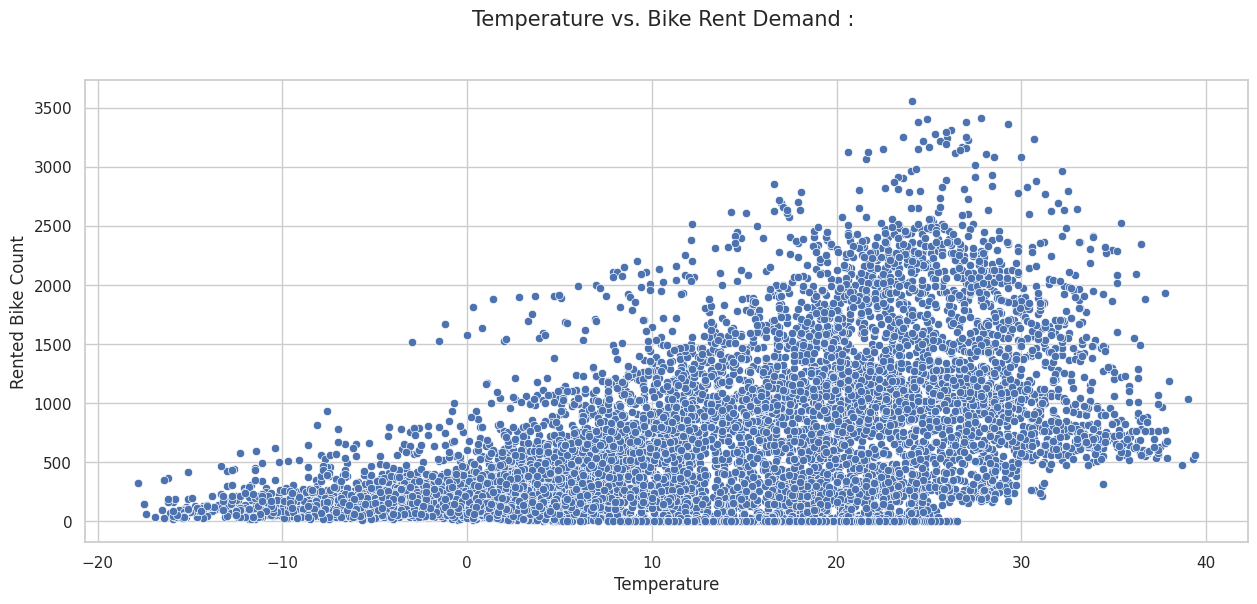

In [36]:
# Chart - 6 visualization code

fig, ax = plt.subplots(figsize=(15,6))

plt.title("Temperature vs. Bike Rent Demand : \n\n", fontsize=15, fontweight=0, loc='center' , style='normal' )

sns.set(style='whitegrid')
sns.scatterplot(x="Temperature", y="Rented Bike Count", data=BikeShare2)

plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is a suitable choice since we want to understand the relationship between two numerical variables, i.e temperature and bike rental demand. Scatter plots allow you to visually assess whether there is a correlation or pattern between these two variables.

##### 2. What is/are the insight(s) found from the chart?

**Correlation:** We can observe that there is a positive correlation between temperature and bike rental demand.Since  as temperature increases, demand also increases hence it indicates a positive correlation.

**Non-Linear Relationships:** The scatter plot shows that 10°C -30°C is the optimal temperature range where demand peaks, while the demand decreases at both lowest ( - 10°C to 30°C) and higher temperatures ( 30°C to 40°C) range.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Since the scatter plot shows a strong positive correlation between temperature and bike rental demand, hrence we can use this insight for demand forecasting. During warmer periods, we can prepare for increased demand by ensuring an adequate supply of bikes and optimized staffing. This will lead to increased revenue and customer satisfaction.

**Negative Impact:** The scatter plot displays areas where the demand has dreased. Hence there is a need for adapt to seasonal variations by reallocating resources and marketing efforts to different times or locations. Neglecting such insights could lead to inefficient resource allocation and potentially negative growth, as customers might face a shortage of bikes during peak demand.



#### Chart - 7

>  <h2> <b> <font color ="#333">  Scatter Plot of Humidity vs. Bike Rent Demand  </div> </b>

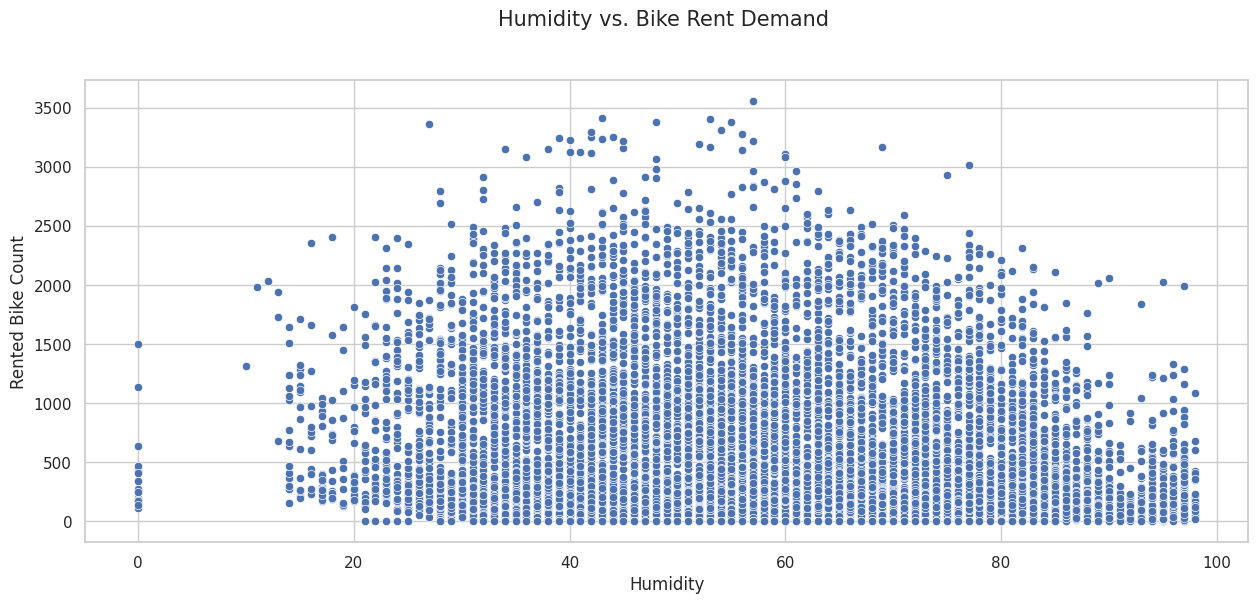

In [38]:
# Chart - 7 visualization code

fig, ax = plt.subplots(figsize=(15,6))

plt.title("Humidity vs. Bike Rent Demand \n\n", fontsize=15, fontweight=0, loc='center' , style='normal' )


sns.set(style='whitegrid')
sns.scatterplot(x="Humidity", y="Rented Bike Count", data=BikeShare2)

plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are particularly useful when investigating potential correlations or patterns between two numeric variables.Scatter plot of Humidity vs. Demand  allows us to explore the relationship between humidity and bike demand, which is important for a bike-sharing service.

##### 2. What is/are the insight(s) found from the chart?

**Negative Correlation:** The plot shows negative correlation between humidity and bike demand. As humidity % increases, demand for bikes decreases.

**Outliers:** Outliers are present in the data, because the are data points that are not following the pattern trend. On 0 % humidity we can bikes rented.
These data points can be considered as outliers



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact**

**Optimizing Bike Availability:** Understanding the negative correlation between humidity and demand will help business optimize bike availability. During periods of high humidity (when demand is lower), we can consider reallocating resources, such as bikes and staff, to other areas or activities.

**Pricing Strategies:** The insights inform pricing strategies. The company can offer discounts and promotions during high humidity periods to incentivize ridership.

**Marketing and Communication:** We can try to focus its advertising and outreach on days when humidity is low and demand is high to attract more riders.


#### Chart - 8

>  <h2> <b> <font color ="#333">  Scatter Plot of Windspeed vs. Bike Rent Demand  </div> </b>

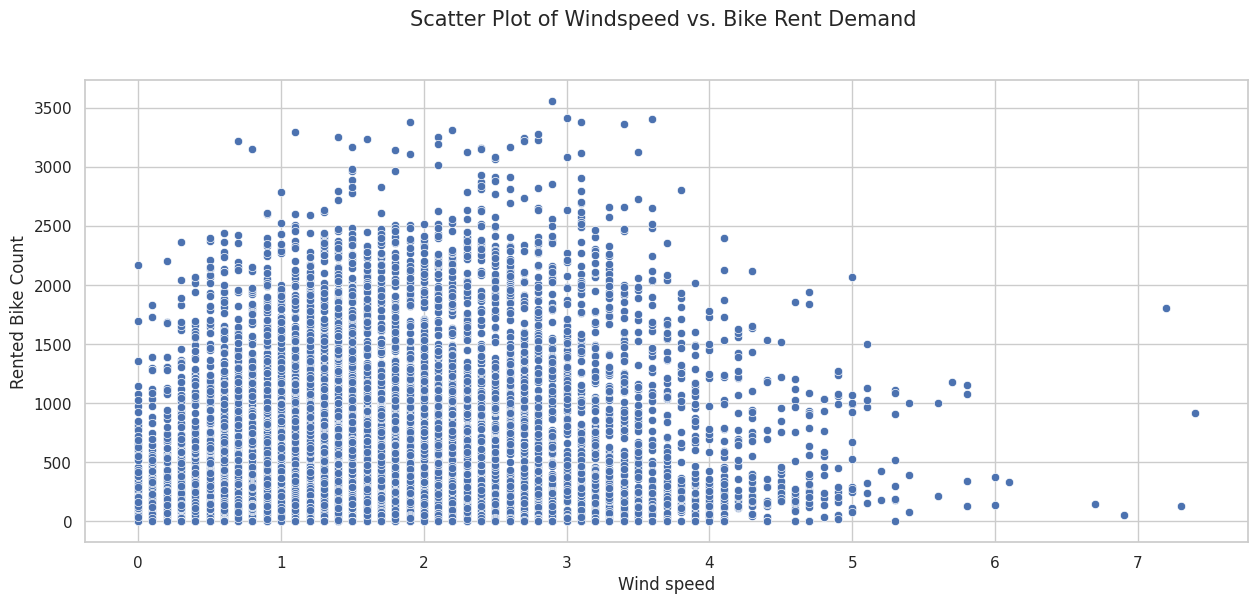

In [41]:
# Chart - 8 visualization code

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(15,6))
plt.title("Scatter Plot of Windspeed vs. Bike Rent Demand \n\n", fontsize=15, fontweight=0, loc='center' , style='normal' )
sns.scatterplot(x="Wind speed", y="Rented Bike Count", data=BikeShare2)

plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot of Windspeed vs. Demand helps to investigate the relationship between windspeed and bike demand, because it's crucial to understand how weather conditions affect bike usage. Scatter plots are an effective tool for visualizing potential correlations or patterns between two numeric variables.

##### 2. What is/are the insight(s) found from the chart?

**Negative Correlation:** The chart shows a negative correlation between windspeed and bike demand. This suggests that as windspeed increases, bike demand tends to decrease. Conversely, on days with low windspeed, bike demand may be higher.

**Thresholds or Clusters:** There could be specific thresholds or clusters in the data. For instance, very high windspeed might lead to a significant drop in demand, but moderate windspeed might not have as pronounced an effect. Identifying these thresholds can inform operational decisions.

**Outliers:** Outliers may be visible, indicating instances where the impact of windspeed on demand is notably different from the general trend. These outliers may represent extreme weather conditions, special events, or other factors affecting bike usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

>  <h2> <b> <font color ="#333"> Line Plot of Day of the Week vs. Bike Rent Demand  </div> </b>

In [ ]:
DOW_count = BikeShare2.groupby(["day"])["Rented Bike Count"].sum().reset_index(name="count")
DOW_count

day   count
0     Friday  950334
1     Monday  911743
2   Saturday  885492
3     Sunday  780194
4   Thursday  861999
5    Tuesday  858596
6  Wednesday  923956

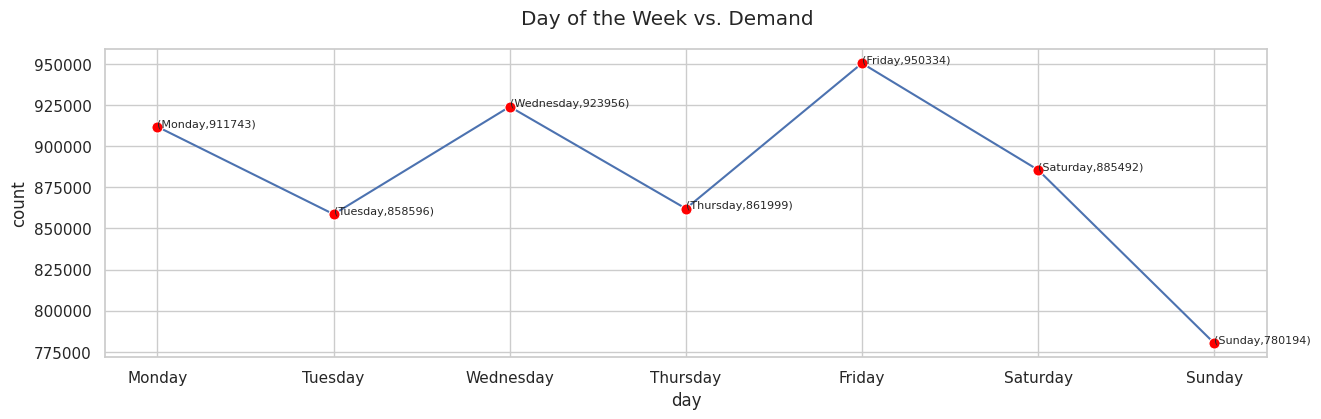

In [ ]:
# Chart - 9 visualization code

#Grouping the dataset by 'day' column
DOW_count = BikeShare2.groupby(["day"])["Rented Bike Count"].sum().reset_index(name="count")

fig, ax = plt.subplots(figsize=(15, 4))

fig.suptitle('Day of the Week vs. Demand')

#creating order for line plot display
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_sorted = DOW_count.iloc[DOW_count['day'].map(lambda x: days_of_week.index(x)).argsort()]

Line_plot_vis = sns.lineplot(data = df_sorted, x = 'day',y='count', marker='o', markersize=8, markerfacecolor='red' )


for i, j in zip(df_sorted['day'],df_sorted['count'] ):
    Line_plot_vis.text( i, j, f'({i},{j})', fontsize = 8)


plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

>  <h2> <b> <font color ="#333">  Line Plot of Hour of the Day vs. Bike Rent Demand   (Monthly basis) : </div> </b>

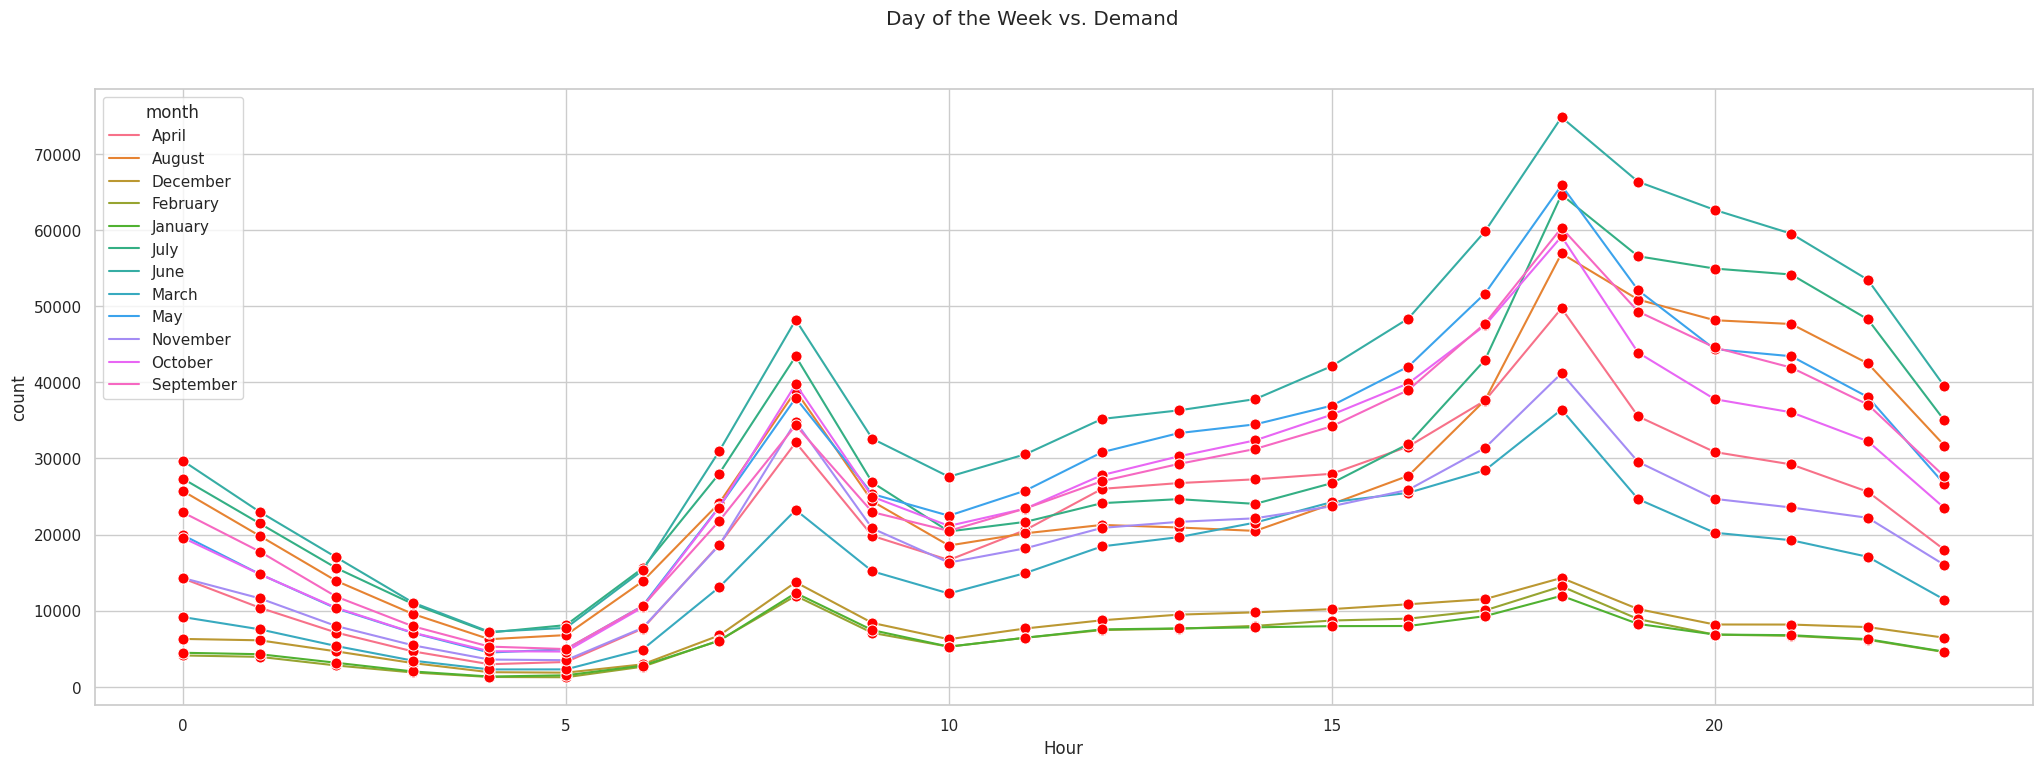

In [ ]:
# Chart - 10 visualization code

#Grouping by Hour and month
HOD_count = BikeShare2.groupby(["month","Hour"])["Rented Bike Count"].sum().reset_index(name="count")

fig, ax = plt.subplots(figsize=(25, 8))

fig.suptitle('Hour of the Day vs. Demand')

Line_plot_vis = sns.lineplot(data = HOD_count, x = 'Hour',y='count',hue = 'month', marker='o', markersize=8, markerfacecolor='red' )

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

>  <h2> <b> <font color ="#333">  Pie Chart of Bike Rent Demand  by Season: </div> </b>

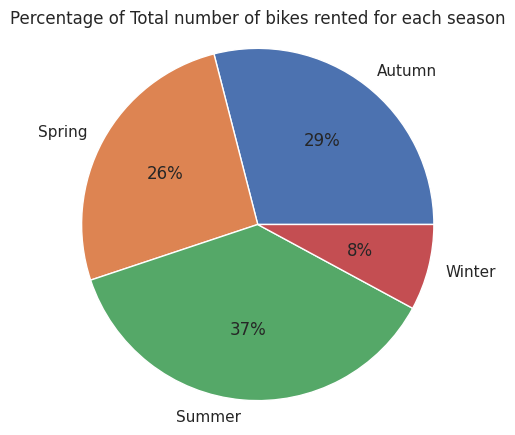

In [ ]:
# Chart - 11 visualization code

Season_count = BikeShare2.groupby(["Seasons"])["Rented Bike Count"].sum().reset_index(name="Rented Bike Count")
Seasons = [x for x in Season_count['Seasons']]
Season_RBC = [x for x in Season_count['Rented Bike Count']]

plt.figure(figsize=(5,5))
plt.pie(Season_RBC,labels= Seasons,autopct='%0.0f%%')
plt.title("Percentage of Total Number of Bikes Rented For Each Season")
plt.axis("equal")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

>  <h2> <b> <font color ="#333"> Scatter Plot of Rainfall vs. Bike Rent Demand </div> </b>

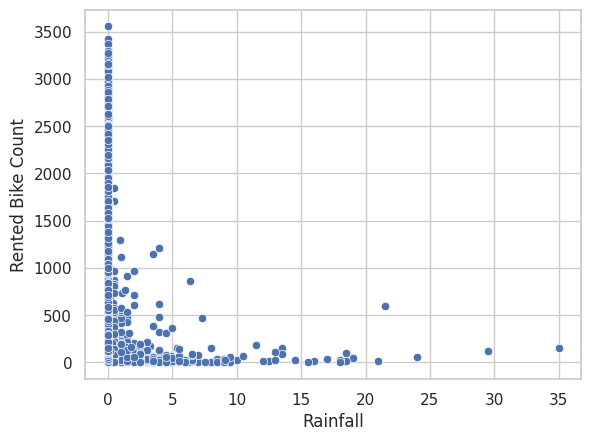

In [ ]:
# Chart - 12 visualization code



sns.set(style='whitegrid')
sns.scatterplot(x="Rainfall", y="Rented Bike Count", data=BikeShare2)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

>  <h2> <b>  Scatter Plot of Visibility vs. Bike Rent Demand  </div> </b> </div> </b>

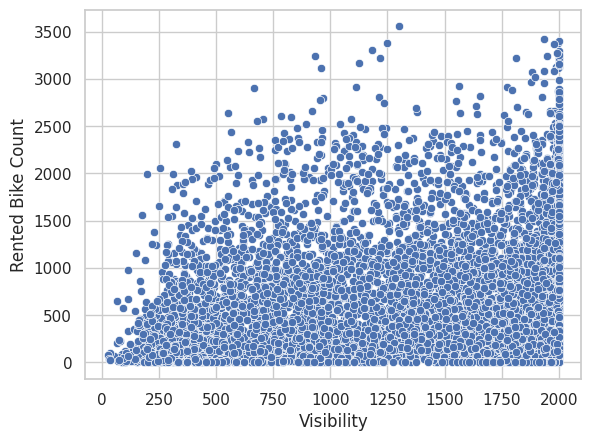

In [ ]:
# Chart - 13 visualization code


sns.set(style='whitegrid')
sns.scatterplot(x="Visibility", y="Rented Bike Count", data=BikeShare2)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

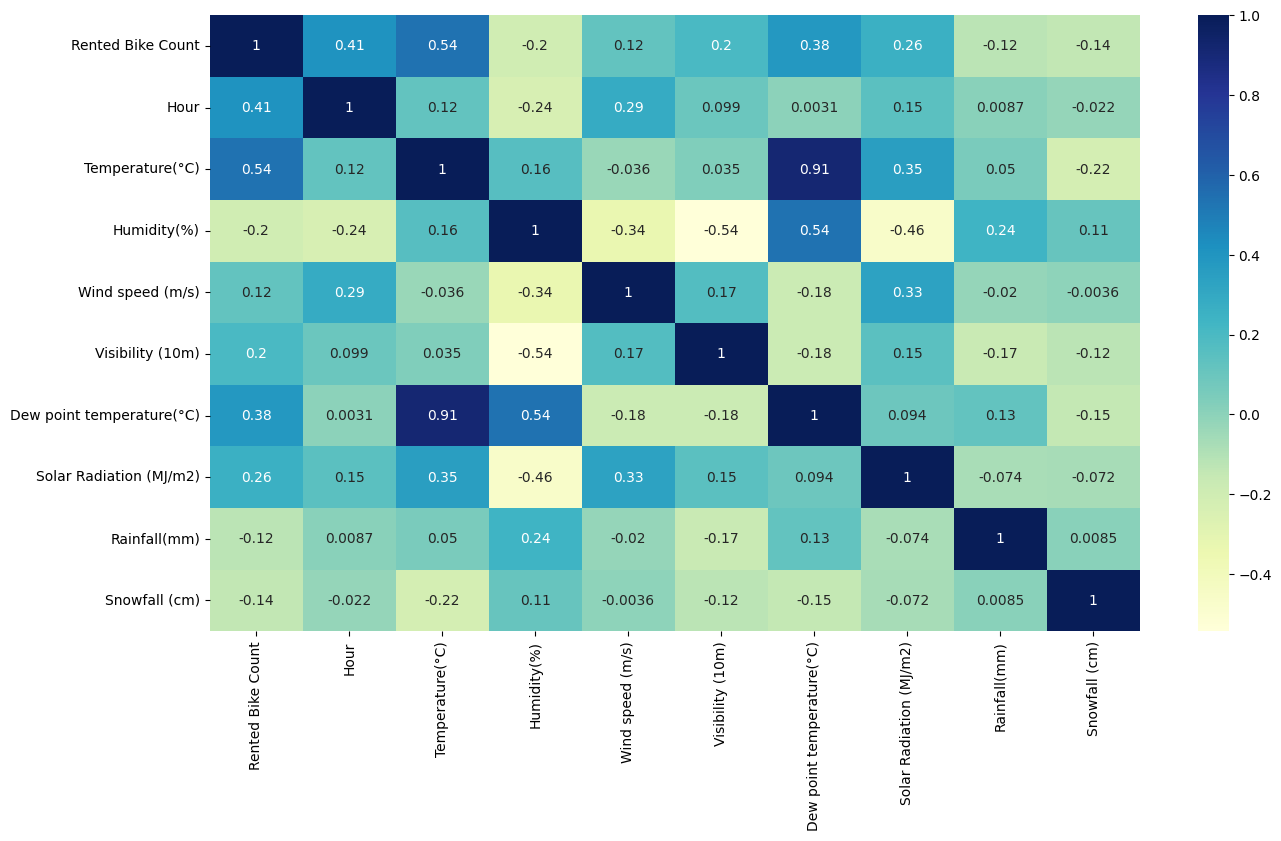

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15, 8))
sns.heatmap(BikeShare2.corr(), cmap="YlGnBu", annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

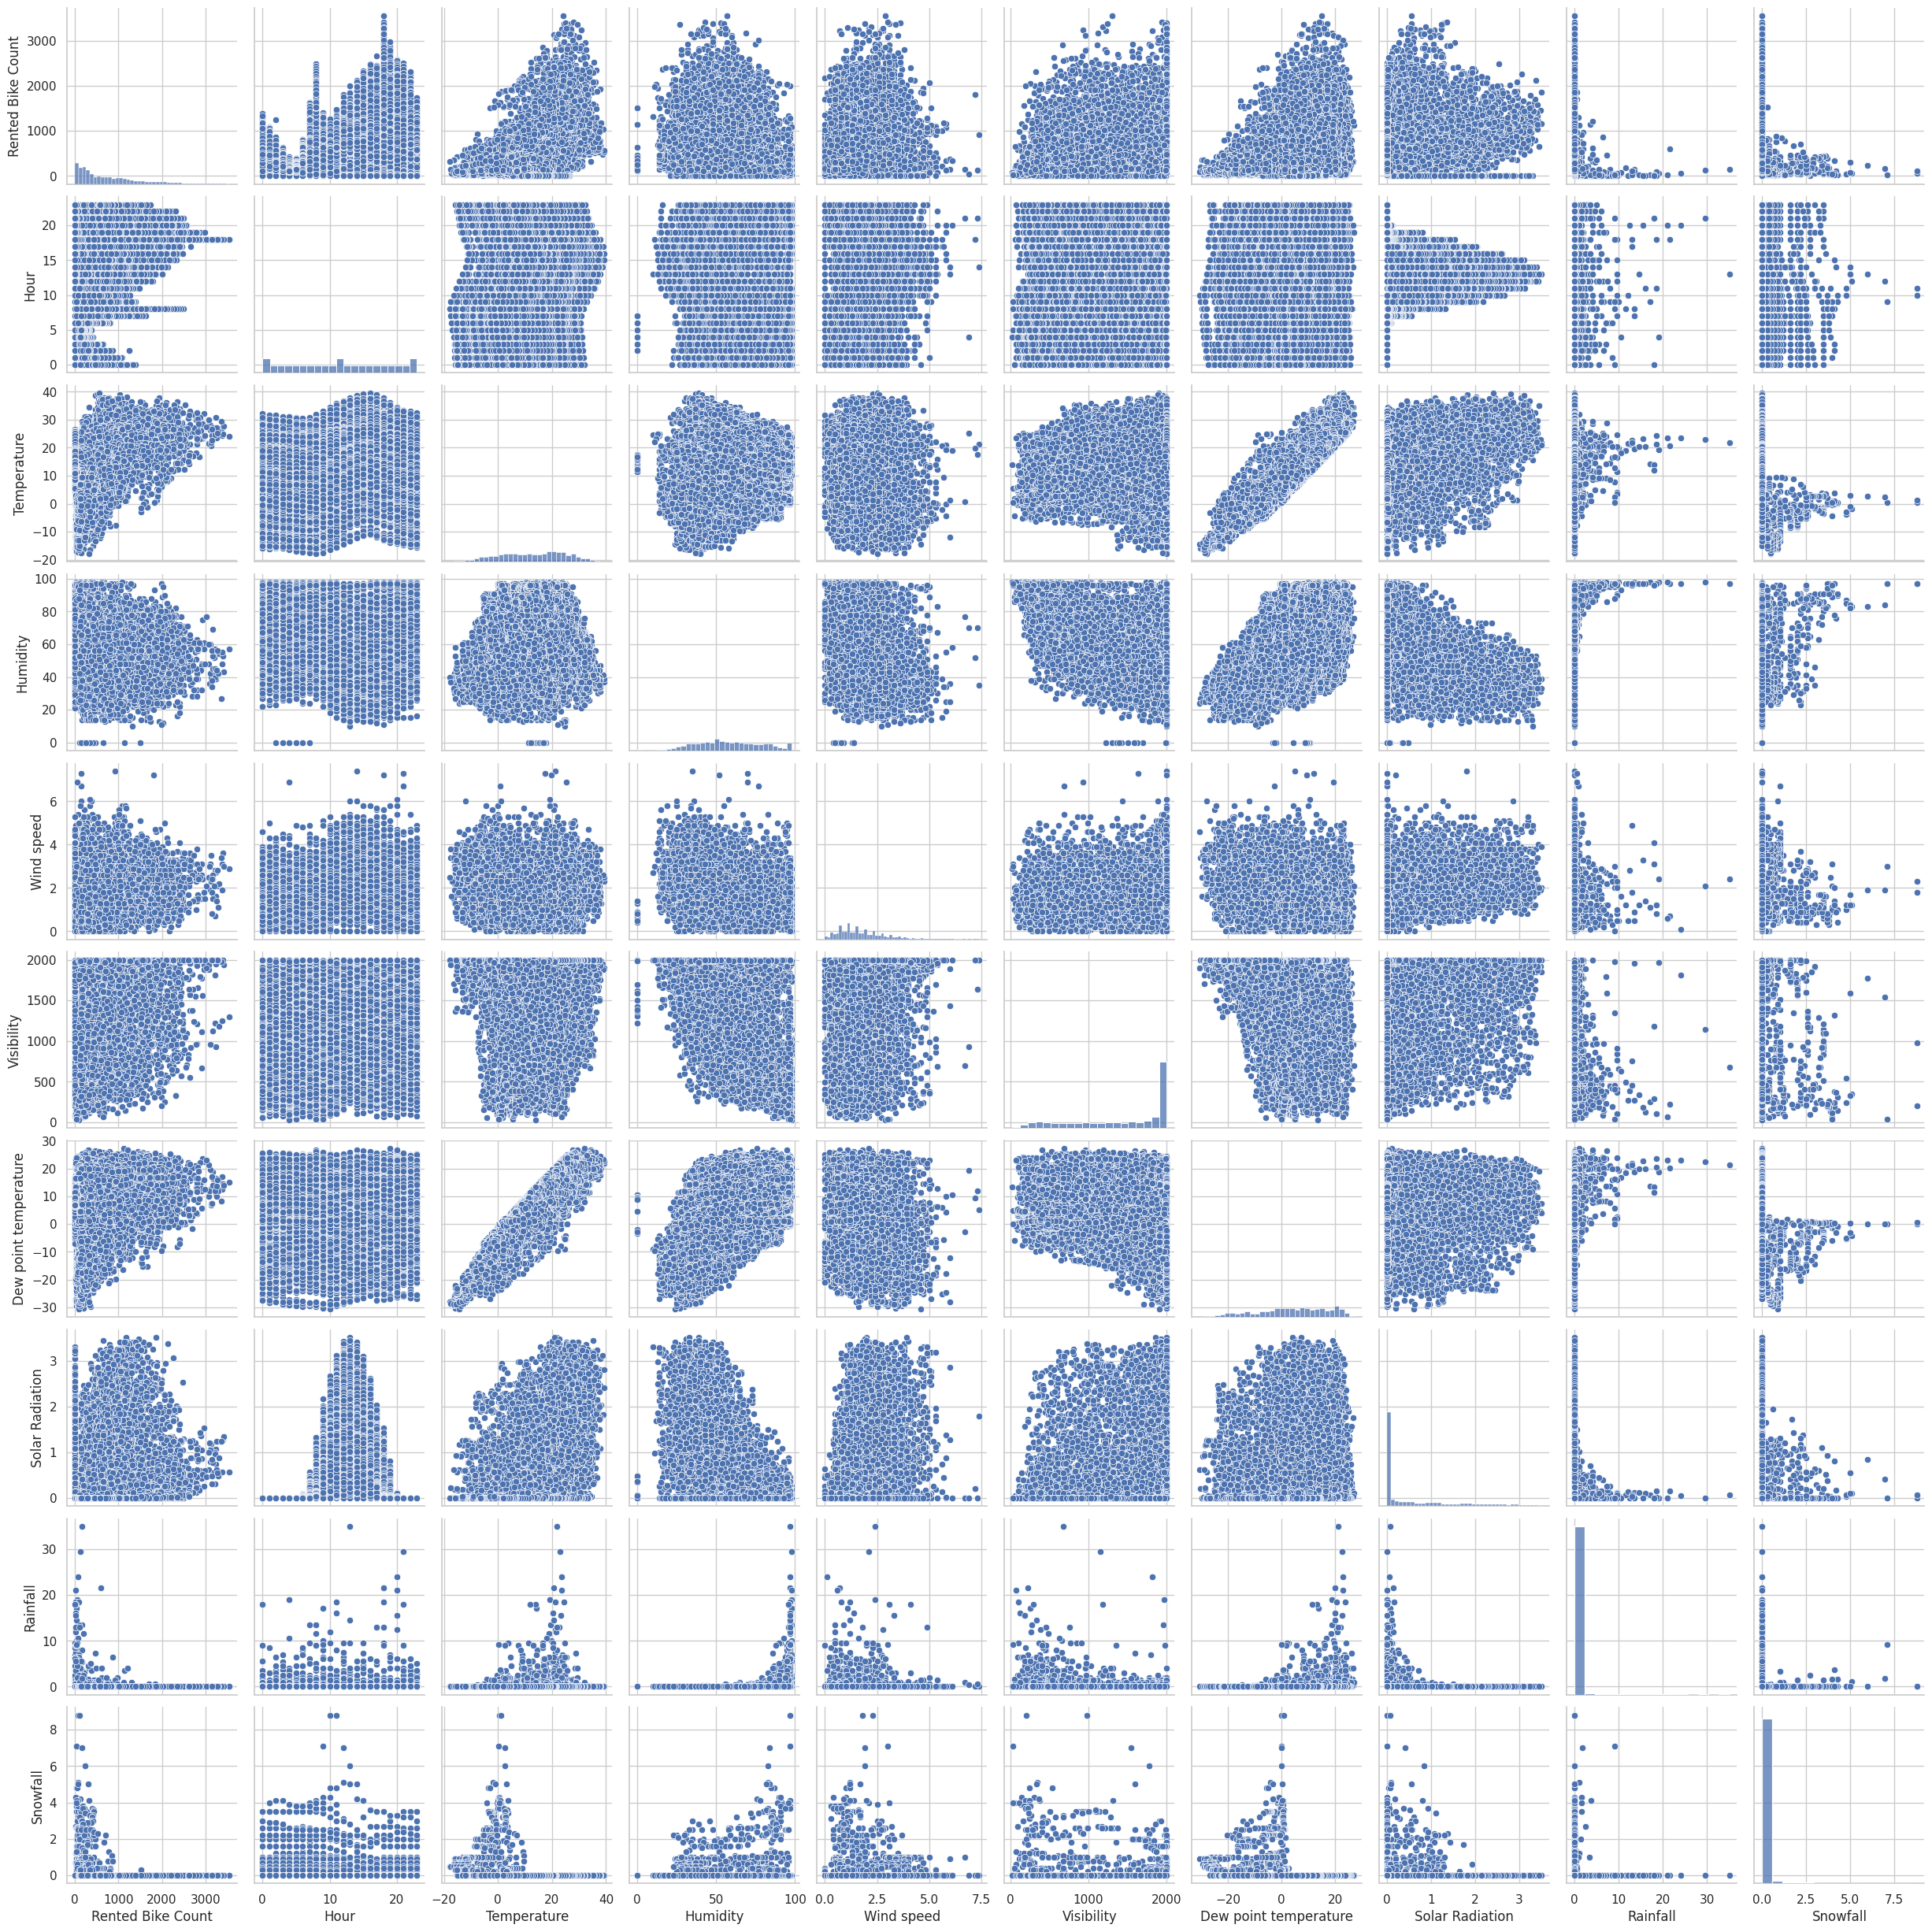

In [ ]:
# Pair Plot visualization code
sns.pairplot(BikeShare2)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***